In [1]:
!pip install librosa
!pip install matplotlib
!pip install ipython
!pip install pandas
!pip install tqdm
!pip install resampy
!pip install tensorflow
!pip install keras
!pip install np_utils
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
filename = "/Users/sboora01/Desktop/Sound detection/Dog bark.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
import numpy as np

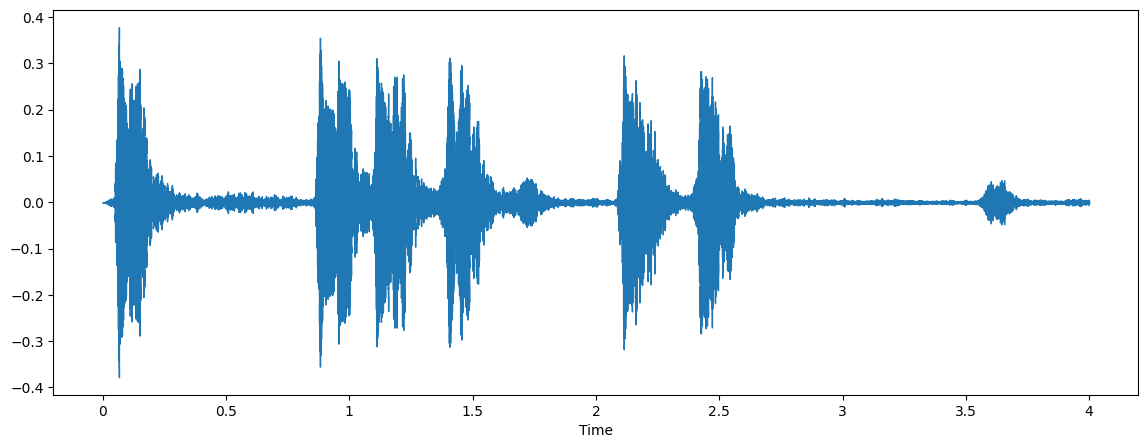

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

/var/folders/65/x7k8wmfd2pn6b92sq6rggvkm0000gp/T/ipykernel_58444/2709675093.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


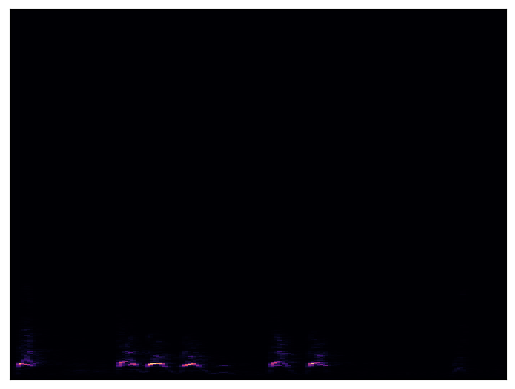

In [6]:
sgram = librosa.stft(data)
librosa.display.specshow(sgram)

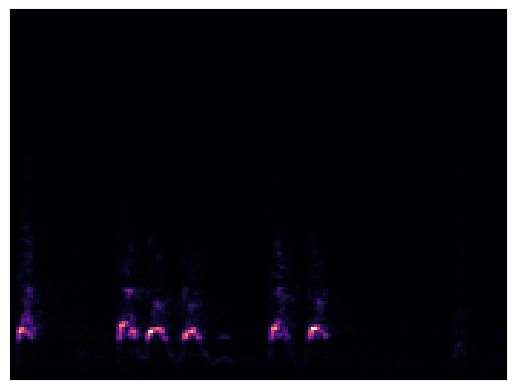

In [7]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

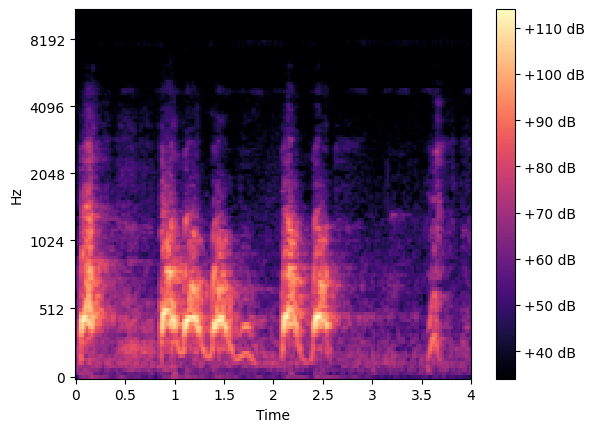

In [8]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [9]:
sample_rate

22050

In [10]:
data

array([-6.4986525e-05, -8.5736974e-05, -3.8254657e-06, ...,
        1.1529359e-03,  1.4101637e-03,  1.9316010e-03], dtype=float32)

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio =wav.read(filename)

In [12]:
wave_sample_rate

44100

In [13]:
wave_audio

array([[ 1, -6],
       [-1, -6],
       [-2, -3],
       ...,
       [40, 69],
       [43, 76],
       [51, 74]], dtype=int16)

In [14]:
metadata =pd.read_csv("/Users/sboora01/Desktop/Sound detection/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [16]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=40)
print(mfccs.shape[1])

173


In [17]:
mfccs

array([[-5.41854431e+02, -4.39162842e+02, -3.22140686e+02, ...,
        -4.59716583e+02, -4.59291656e+02, -4.77126160e+02],
       [ 7.30783844e+01,  1.59203552e+02,  2.23042847e+02, ...,
         1.18545753e+02,  1.16215385e+02,  1.05105545e+02],
       [ 3.65911484e+01,  4.48636398e+01, -3.07481885e-01, ...,
         1.57234001e+01,  1.10129118e+01,  1.13161068e+01],
       ...,
       [ 4.87203169e+00,  2.14763761e+00, -9.28348660e-01, ...,
        -7.14375228e-02,  2.99585772e+00,  3.76318717e+00],
       [ 2.29147625e+00,  4.21898413e+00, -1.45970452e+00, ...,
        -1.15118561e+01, -2.09812737e+00,  3.21031618e+00],
       [-3.43045998e+00, -2.82290196e+00, -5.10348225e+00, ...,
        -5.37568617e+00,  7.03069329e-01, -8.96517038e-02]], dtype=float32)

In [18]:
audio_dataset_path = "/Users/sboora01/Desktop/Sound detection/UrbanSound8K/audio"
metadata=pd.read_csv('/Users/sboora01/Desktop/Sound detection/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
import librosa
import os
from tqdm import tqdm

max_frame_len = 0
all_frame_lengths = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    
    try:
        y, sr = librosa.load(file_name, sr=22050)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

        frame_len = mfcc.shape[1]
        all_frame_lengths.append(frame_len)

        if frame_len > max_frame_len:
            max_frame_len = frame_len

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

if all_frame_lengths:
    min_frame_len = min(all_frame_lengths)
    print("🔍 Max number of MFCC frames:", max_frame_len)
    print("🔎 Min number of MFCC frames:", min_frame_len)
else:
    print("🚫 No valid MFCC frame lengths found.")


In [24]:
duration = 4.0              # วินาที
sample_rate = 22050         # ตัวอย่างต่อวินาที
hop_length = 512            # ความละเอียดเวลา
n_fft = 2048   

In [25]:
num_frames = 1 + int((duration * sample_rate - n_fft) / hop_length)
num_frames

169

still use time

In [19]:

max_pad_len = 174

def extract_features(file_name):

    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfccs

In [20]:
from tqdm import tqdm 
extracted_feature=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=extract_features(file_name)
    extracted_feature.append([data,final_class_labels])


0it [00:00, ?it/s]

3554it [01:12, 47.18it/s]/Users/sboora01/Desktop/Sound detection/.venv/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8318it [02:44, 60.82it/s] /Users/sboora01/Desktop/Sound detection/.venv/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/sboora01/Desktop/Sound detection/.venv/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:51, 50.78it/s]


In [ ]:
extracted_feature

In [21]:
extracted_features_df=pd.DataFrame(extracted_feature,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[[-335.0899, -176.70966, -98.33869, -65.15997,...",dog_bark
1,"[[-492.1376, -455.06793, -449.95038, -444.2668...",children_playing
2,"[[-496.66345, -471.2096, -479.95898, -485.4825...",children_playing
3,"[[-447.43988, -412.1046, -408.45084, -408.2987...",children_playing
4,"[[-473.87814, -438.34927, -442.38864, -441.715...",children_playing


In [22]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [23]:
X.shape


(8732, 40, 174)

In [24]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [26]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [27]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train

array([[[-1.15400642e+02, -7.60615158e+01, -7.33756714e+01, ...,
         -9.14748077e+01, -9.06765823e+01,  0.00000000e+00],
        [ 1.16735649e+02,  1.22419235e+02,  1.23610764e+02, ...,
          1.03078125e+02,  8.43221359e+01,  0.00000000e+00],
        [-7.74890366e+01, -8.58440094e+01, -8.60145874e+01, ...,
         -9.15865021e+01, -8.19669342e+01,  0.00000000e+00],
        ...,
        [-1.09876239e+00, -1.87175274e-02,  8.33872020e-01, ...,
          1.57031226e+00,  4.74225760e+00,  0.00000000e+00],
        [ 5.91827631e-01,  4.26934004e-01,  1.64386594e+00, ...,
          3.04774165e+00,  6.42001629e-04,  0.00000000e+00],
        [ 4.11443383e-01, -3.56065369e+00, -1.67110264e+00, ...,
         -1.23946819e+01, -7.53739929e+00,  0.00000000e+00]],

       [[-2.40684448e+02, -2.09493744e+02, -2.08796875e+02, ...,
         -1.65959579e+02, -1.71378555e+02,  0.00000000e+00],
        [ 1.36978912e+02,  1.34739227e+02,  1.33107742e+02, ...,
          1.29013855e+02,  1.14655205e

In [29]:
X_train.shape

(6985, 40, 174)

In [30]:
y_train.shape

(6985, 10)

In [31]:
y_test.shape

(1747, 10)

In [32]:
import tensorflow as tf 

In [33]:
print(tf.__version__)

2.19.0


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU, Dense , Conv2D, MaxPooling2D,GlobalMaxPooling2D,Convolution2D,Dropout,Activation,Flatten,Softmax,GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics 


Make model

In [35]:
MFCC_coefficients = 40
time_frames = 174
channel =1 

X_train = X_train.reshape(X_train.shape[0], MFCC_coefficients, time_frames, channel)
X_test = X_test.reshape(X_test.shape[0], MFCC_coefficients, time_frames, channel)

In [36]:
num_labels = y.shape[1]

In [126]:
num_labels

10

In [140]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,input_shape=(MFCC_coefficients,time_frames,channel),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [141]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [142]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 39, 173, 16)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 19, 86, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 19, 86, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 18, 85, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 9, 42, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 9, 42, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 8, 41, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 4, 20, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 4, 20, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 3, 19, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 1, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 1, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

In [46]:
pip install mlflow

  Using cached mlflow-3.1.1-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-3.1.1-py3-none-any.whl.metadata (30 kB)
  Using cached flask-3.1.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached alembic-1.16.4-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached pyarrow-20.0.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached sqlalchemy-2.0.41-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.6 kB)
  Using cached cachetools-6.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached pydantic-2.11.7-py3-none

In [48]:
import mlflow
from mlflow.tensorflow import MlflowCallback

In [110]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
mlflow.set_experiment("cnn_demo_model_2")

2025/07/18 16:14:14 INFO mlflow.tracking.fluent: Experiment with name 'cnn_demo_model_2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/308024176399469232', creation_time=1752830054021, experiment_id='308024176399469232', last_update_time=1752830054021, lifecycle_stage='active', name='cnn_demo_model_2', tags={}>

In [52]:
type(X_train)
type(X_test)

numpy.ndarray

In [143]:
if mlflow.active_run():
    mlflow.end_run()  # ป้องกัน run ซ้อนกัน

with mlflow.start_run() as run:
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 128)

    # Train model
    model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[
            MlflowCallback(run),
            tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True),
        ]
    )

    # Log metrics
    train_score = model.evaluate(X_train, y_train, verbose=0)
    test_score = model.evaluate(X_test, y_test, verbose=0)
    mlflow.log_metric("Training Accuracy", train_score[1])
    mlflow.log_metric("Test Accuracy", test_score[1])

    # Log model
    model_info = mlflow.tensorflow.log_model(model, artifact_path="final_model",)

# ✅ Ensure the run is closed (in case you're outside with-block or in notebook)
mlflow.end_run()


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2638 - loss: 3.6442 - val_accuracy: 0.4574 - val_loss: 1.5848
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5227 - loss: 1.3411 - val_accuracy: 0.5627 - val_loss: 1.3074
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5964 - loss: 1.1296 - val_accuracy: 0.6016 - val_loss: 1.1755
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6435 - loss: 1.0077 - val_accuracy: 0.6308 - val_loss: 1.0906
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6760 - loss: 0.9237 - val_accuracy: 0.7355 - val_loss: 0.8757
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7259 - loss: 0.8176 - val_accuracy: 0.6772 - val_loss: 0.9304
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7643 - loss: 0.7306 - val_accuracy: 0.7436 - val_loss: 0.7859
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7706 - loss: 0.6776 - val_accu

2025/07/21 16:39:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/21 16:39:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/07/21 16:39:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run gentle-shrew-587 at: http://127.0.0.1:5000/#/experiments/308024176399469232/runs/b9b9473952e543b284e86fb8633b33f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/308024176399469232


In [116]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9819613695144653
Testing Accuracy:  0.9238694906234741


In [117]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)


<class 'numpy.ndarray'> (6985, 40, 174, 1)
<class 'numpy.ndarray'> (6985, 10)


In [118]:
model_info

In [119]:
model_name ="CNN"
model_version = 1
model_uri = f"models:/{model_name}/{model_version}"

# model_uri="mlflow-artifacts:/357407728306070409/efdf382760104e7db50022a6f9ce8c7b/artifacts"

loaded_model = mlflow.tensorflow.load_model(model_uri)


In [120]:
loaded_model

<Sequential name=sequential_10, built=True>

In [121]:
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # เปลี่ยนจาก probability → class index
y_true = np.argmax(y_test, axis=1)  # ถ้า y_test เป็น one-hot

cm = confusion_matrix(y_true, y_pred)
print(cm)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[197   0   1   0   0   3   0   0   1   1]
 [  0  81   0   1   1   1   1   1   0   0]
 [  1   0 151   5   2   6   1   0   1  16]
 [  2   1   1 186   1   3   4   2   1   0]
 [  0   1   2   0 195   2   1   4   1   0]
 [  2   1   0   0   1 188   0   1   0   0]
 [  0   1   0   1   0   0  70   0   0   0]
 [  0   1   0   0   6   1   0 199   0   1]
 [  0   1   1   1   0   1   0   0 159   2]
 [  7   3   9   4   2  12   0   0   5 188]]


In [122]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, MFCC_coefficients,time_frames,channel)

    predicted_prob = loaded_model.predict(prediction_feature)               # shape = (1, 10)
    predicted_vector = np.argmax(predicted_prob, axis=1)       # shape = (1,) → class index
    predicted_class = labelencoder.inverse_transform(predicted_vector)  
    print("The predicted class is:", predicted_class[0], '\n') 

In [123]:
filename = '/Users/sboora01/Desktop/Sound detection/UrbanSound8K/audio/fold2/14780-9-0-0.wav' 
print_prediction(filename) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The predicted class is: street_music 



In [124]:
filename = '/Users/sboora01/Desktop/Sound detection/UrbanSound8K/audio/fold2/204773-3-7-1.wav' 
print_prediction(filename) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The predicted class is: dog_bark 



In [125]:
filename = '/Users/sboora01/Desktop/Sound detection/UrbanSound8K/audio/fold7/102853-8-0-0.wav' 
print_prediction(filename) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The predicted class is: siren 

